In [2]:
import os
import xarray as xr
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import hydromt
import numpy as np
sys.path.append(r'C:\Users\lelise\Documents\GitHub\flood_model_carolinas\syntheticTCs_cmpdfld')
from src.utils import calculate_flooded_area_by_process

In [3]:
os.chdir(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter3_SyntheticTCs\04_RESULTS\NCEP_tmp\fld_area_tables')
basin_fld_area = {}
for f in os.listdir(os.getcwd()):
    if f.endswith('csv'):
        df = pd.read_csv(f, index_col=0)
        basin = f.split('_')[0]
        basin_fld_area[basin] = df
        print(basin)

# Load Vmax at landfall
vmax = pd.read_csv(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter3_SyntheticTCs\02_DATA\NCEP_Reanalysis\tracks\ncep_TCs_vstore100.csv',
                   index_col=0)
vmax.set_index('tc_id', inplace=True, drop=True)

# Load basin rainfall stats
rain = pd.read_csv(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter3_SyntheticTCs\02_DATA\NCEP_Reanalysis\rain\TC_maxRainRate_by_basin.csv',
                  index_col=0)
print(rain)

Cape Fear
Lower Pee Dee
Neuse
Onslow Bay
Pamlico
      Pamlico  Neuse  Onslow Bay  Cape Fear  Lower Pee Dee
3        0.00   0.00        0.00       0.00           0.57
4       10.36  11.54       11.17      21.43          44.58
6        0.74   0.26        8.52       9.82           9.95
18      16.23  21.24       23.47      26.56          51.67
21       1.33   1.64        1.79       1.13           1.55
...       ...    ...         ...        ...            ...
5011     0.95   1.15        1.37       1.08           2.71
5014    44.95  45.24       41.75      30.50           2.25
5015     1.10   1.65        2.52       2.58           7.18
5017     2.60   3.68        4.18       5.10          14.92
5018     1.02   2.02        1.87       3.43          13.70

[1312 rows x 5 columns]


In [5]:
font = {'family': 'Arial', 'size': 10}
mpl.rc('font', **font)
mpl.rcParams.update({'axes.titlesize': 10})
mpl.rcParams["figure.autolayout"] = True

basins = list(basin_fld_area.keys())
scenarios = ['Coastal','Runoff', 'Compound']
nrow = len(basins)
ncol = len(scenarios)
n_subplots = nrow * ncol
first_in_row = np.arange(0, n_subplots, ncol)
last_in_row = np.arange(ncol - 1, n_subplots, ncol)
first_row = np.arange(0, ncol)
last_row = np.arange(first_in_row[-1], n_subplots, 1)

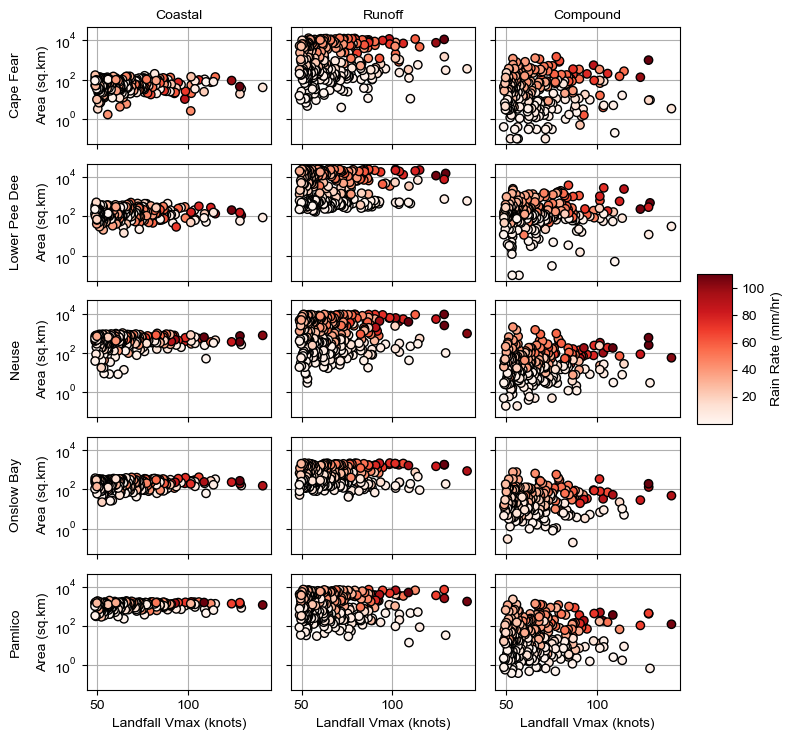

In [31]:
figsize = (7, 7.5)
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=figsize, tight_layout=True, sharex=True, sharey=True)
for i in range(len((basins))):
    basin = basins[i]
    bdf = basin_fld_area[basin]
    vmaxdf = vmax[vmax.index.isin(bdf.index)]
    raindf = rain[rain.index.isin(bdf.index)][basin]
    combined = pd.concat(objs=[bdf, vmaxdf, raindf], axis=1, ignore_index=False)

    for k in range(len(scenarios)):
        scenario = scenarios[k]
        ax = axes[i][k]
        sc = ax.scatter(combined['vstore100'], combined[scenario], c=combined[basin],
                        cmap='Reds', marker='o', edgecolor='black')
        ax.grid(True)
        ax.set_yscale('log')
        ax.set_axisbelow(True)
        
axes = axes.flatten()

for kk in range(nrow):
    axes[first_in_row[kk]].text(-0.35, 0.5, basins[kk],
                                horizontalalignment='right',
                                verticalalignment='center',
                                rotation='vertical',
                                transform=axes[first_in_row[kk]].transAxes)
    axes[first_in_row[kk]].set_ylabel('Area (sq.km)')
    if kk == 2:
        pos0 = axes[first_in_row[kk]].get_position()  # get the original position
        cax1 = fig.add_axes([pos0.x1 + 0.65, pos0.y0, 0.05, pos0.height * 1.5])
        cbar1 = fig.colorbar(sc,
                             cax=cax1,
                             orientation='vertical',
                             ticks=[20, 40, 60, 80, 100],
                             label='Rain Rate (mm/hr)'
                             )
        cbar1.ax.set_yticklabels(labels=['20', '40', '60', '80', '100'])

for kk in range(ncol):
    axes[last_row[kk]].set_xlabel('Landfall Vmax (knots)')
    axes[first_row[kk]].set_title(scenarios[kk])

#plt.colorbar(sc)
plt.subplots_adjust(wspace=0, hspace=0)
plt.margins(x=0, y=0)
#plt.savefig('compound_extent.jpg', dpi=300, bbox_inches="tight")
#plt.close()
